# Task 3 - CNNs, ResNets, Transfer Learning and Grad-CAM

# Topics

In this exercise sheet, you will:
- Work with a dataset consisting of images of electronic waste.
- Implement a CNN for classification
- Compare MLP and CNN
- Vary architecture to improve model performance
- Implement a ResNet
- Apply transfer learning using ResNet50
- Apply Grad-CAM class activation visualization

*We are looking forward to seeing your solutions! Have fun!*

## Imports

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import models, layers, optimizers, losses, callbacks
import seaborn as sns
import matplotlib.pyplot as plt

# gpus = tf.config.list_physical_devices('GPU')
# tf.config.set_visible_devices(gpus, 'GPU')

# Subtask 2.1

## Loading e-waste dataset



The data is available here: [https://tucloud.tu-clausthal.de/index.php/s/HMle0Ievm3ITBu0](https://tucloud.tu-clausthal.de/index.php/s/HMle0Ievm3ITBu0)

Password is: EK_data


In this task, we are looking for an automated classification of electronic waste to seven classes, e.g. those containing wood, glass etc. To this end, a dataset containing images of different types of electronic waste is prepared. The data is provided as a `zip` file. Please, extract it in a directory. 

Use `tf.keras.utils.image_dataset_from_directory` to load the dataset from the directory. We have in total 9,906 samples and 7 classes. 

#### TODO

- Consider 80% of the samples for training and 20% for validation.
- Use a batch size of 32
- Resize the image to image height and width of 224 $\times$ 224.

In [3]:
# TODO load dataset from directory
data_dir = "./dataset/"
batch_size = 32
img_height = 224
img_width = 224
num_classes = 7

train_ds, val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 9906 files belonging to 7 classes.
Using 7925 files for training.
Using 1981 files for validation.


#### TODO
- Print the name of classes. 

In [4]:
####################
## YOUR CODE HERE ##
####################
print(train_ds.class_names)

['EK glashaltig', 'EK hochwertig', 'EK holzhaltig', 'Gewerbeabfall', 'Kunststoff', 'Mischkunststoff', 'metallreich']


Let us visualize some samples of the training dataset and their corresponding labels. 

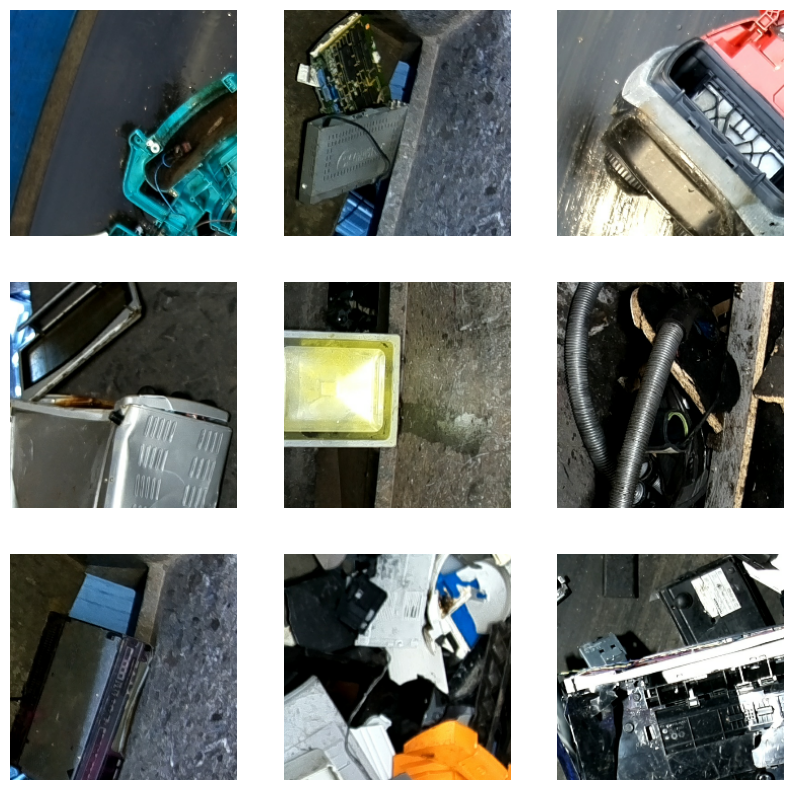

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # plt.title(class_names[labels[i]])
        plt.axis("off")

# Subtask 2.2

## Convolution and Pooling operations

![model]( 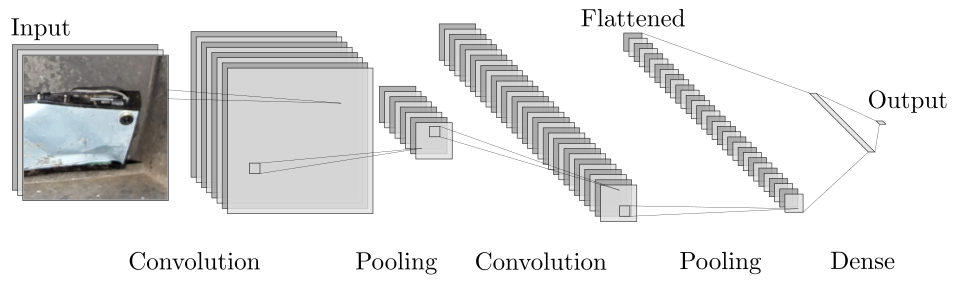)



Let us start by applying convolution and pooling operations on a batch of samples.
#### TODO
 - Take one batch of samples from the training data set.
 - Create a convolution layer containing 8 filters with the size of 3 $\times$ 3 and stride of 1.
 - Apply convolution on the images.
 - Print the input shape.
 - Print the output shape.

In [51]:
image, label = zip(*train_ds.take(1))
x = image[0]
####################
## YOUR CODE HERE ##
####################
conv_layer = tf.keras.layers.Conv2D(
    filters=8,
    kernel_size=(3, 3),
    strides=(1, 1),
    input_shape=(x.shape[1], x.shape[2], x.shape[3]),
)
x_conv = conv_layer(x)
print("Input shape: ", x.shape)
print("output shape: ", x_conv.shape)

Input shape:  (32, 224, 224, 3)
output shape:  (32, 222, 222, 8)


#### TODO
- Print shape of the trainable parameters of the layer. You can use `get_weights()` method.

In [52]:
####################
## YOUR CODE HERE ##
####################
print("Shape of the trainable parameters:")
weights = conv_layer.get_weights()
for weight in weights:
    print(weight.shape)

Shape of the trainable parameters:
(3, 3, 3, 8)
(8,)


#### TODO
 - Perform zero padding to get the same shape after convolution. 

In [53]:
####################
## YOUR CODE HERE ##
####################

"""
When you use padding='same' with strides=1,
the input are zero-padded so that width and height of
output is the same as the input.
"""

conv_layer = tf.keras.layers.Conv2D(
    filters=8,
    kernel_size=(3, 3),
    padding="same",
    strides=(1, 1),
    input_shape=(x.shape[1], x.shape[2], x.shape[3]),
)
x_conv = conv_layer(x)
print("Input shape: ", x.shape)
print("output shape: ", x_conv.shape)

Input shape:  (32, 224, 224, 3)
output shape:  (32, 224, 224, 8)


#### TODO
 - Perform convolution as before but with the stride of 2.
 - Print the input and output shapes.

In [54]:
####################
## YOUR CODE HERE ##
####################


conv_layer = tf.keras.layers.Conv2D(
    filters=8,
    kernel_size=(3, 3),
    strides=(2, 2),
    input_shape=(x.shape[1], x.shape[2], x.shape[3]),
)
x_conv = conv_layer(x)
print("Input shape: ", x.shape)
print("output shape: ", x_conv.shape)

Input shape:  (32, 224, 224, 3)
output shape:  (32, 111, 111, 8)


#### TODO
- Create a max pooling layer with the pool size of `(2, 2)`.
- Apply the max pooling operation on a batch of samples.
- Print the input and output shapes.
- Print shape of the trainable parameters.

In [58]:
####################
## YOUR CODE HERE ##
####################
max_pool_layer = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
)
x_pool = max_pool_layer(x)
print("Input shape: ", x.shape)
print("output shape: ", x_pool.shape)
trainable_params_shape = [param.shape for param in max_pool_layer.trainable_weights]
print("Shape of trainable parameters: ", trainable_params_shape)

Input shape:  (32, 224, 224, 3)
output shape:  (32, 112, 112, 3)
Shape of trainable parameters:  []


#### TODO
- Create a global average pooling layer.
- Apply the global average pooling operation on a batch of samples.
- Print the input and output shapes.


In [59]:
####################
## YOUR CODE HERE ##
####################
avg_pool_layer = tf.keras.layers.GlobalAveragePooling2D()
x_pool = avg_pool_layer(x)
print("Input shape: ", x.shape)
print("output shape: ", x_pool.shape)

Input shape:  (32, 224, 224, 3)
output shape:  (32, 3)


# Subtask 2.3

## Convolutional neural networks (CNNs)

#### TODO
- Implement a simple CNN model for classification. You need the following layers:
    - Input
    - Rescaling by a factor of 1/225.
    - Convolution with 8 filters of the size of 3 $\times$ 3 and stride 1.
    - Max pooling with a pool size of `(2, 2)`.
    - Flatten
    - Dense with number of neurons equal to number of classes and `softmax` activation function.
- Print `model.summary()`.
- Train the network using `Adam` optimizer with the learning rate of 0.001 for 20 epochs.
- Use `SparseCategoricalCrossentropy` as the loss function.
- Compute and report the accuracy during training. In `model.compile()` you can set `metrics = ['accuracy']`.
- Use model checkpoints to save the best model.
- Plot the learning curves using the `plot_learning_curves` function provided below. 
    


In [62]:
def plot_learning_curves(hist):
    epochs = np.arange(0, len(hist.history["loss"])) + 1
    sns.set(style="ticks")
    fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
    ax[0].plot(epochs, hist.history["loss"], label="Training loss", marker="o", ls="--")
    ax[0].plot(
        epochs, hist.history["val_loss"], label="Validation loss", marker="o", ls="--"
    )

    ax[1].plot(
        epochs, hist.history["accuracy"], label="Training accuracy", marker="o", ls="--"
    )
    ax[1].plot(
        epochs,
        hist.history["val_accuracy"],
        label="Validation accuracy",
        marker="o",
        ls="--",
    )

    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Loss")
    ax[0].set_title("Loss vs. Epoch")
    ax[0].legend()

    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Accuracy")
    ax[1].set_title("Accuracy vs. Epoch")
    ax[1].legend()
    sns.despine(trim=True, offset=5)

In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 7
inputs = layers.Input(shape=(img_height, img_width, 3))
x = layers.Rescaling(1.0 / 255)(inputs)
x = layers.Conv2D(
    8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"
)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_9 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_45 (Conv2D)          (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 112, 112, 8)      0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 dense_23 (Dense)            (None, 7)                 702471    
                                                           

In [66]:
# TODO compile and train the model

####################
## YOUR CODE HERE ##
####################
num_epochs = 20
learning_rate = 0.001
import os

checkpoint_dir = "./checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, "model_checkpoint.h5")


optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])


checkpoint_callback = keras.callbacks.ModelCheckpoint(
    checkpoint_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max"
)

hist = model.fit(
    train_ds, epochs=num_epochs, validation_data=val_ds, callbacks=[checkpoint_callback], batch_size=32
)

Epoch 1/20
248/248 [==============================] - ETA: 0s - loss: 1.1906 - accuracy: 0.6004
Epoch 1: val_accuracy improved from -inf to 0.67744, saving model to ./checkpoints\model_checkpoint.h5
248/248 [==============================] - 35s 139ms/step - loss: 1.1906 - accuracy: 0.6004 - val_loss: 0.9927 - val_accuracy: 0.6774
Epoch 2/20
248/248 [==============================] - ETA: 0s - loss: 0.5185 - accuracy: 0.8457
Epoch 2: val_accuracy did not improve from 0.67744
248/248 [==============================] - 40s 161ms/step - loss: 0.5185 - accuracy: 0.8457 - val_loss: 0.9434 - val_accuracy: 0.6749
Epoch 3/20
248/248 [==============================] - ETA: 0s - loss: 0.2354 - accuracy: 0.9462
Epoch 3: val_accuracy improved from 0.67744 to 0.72287, saving model to ./checkpoints\model_checkpoint.h5
248/248 [==============================] - 38s 153ms/step - loss: 0.2354 - accuracy: 0.9462 - val_loss: 0.9252 - val_accuracy: 0.7229
Epoch 4/20
248/248 [==============================

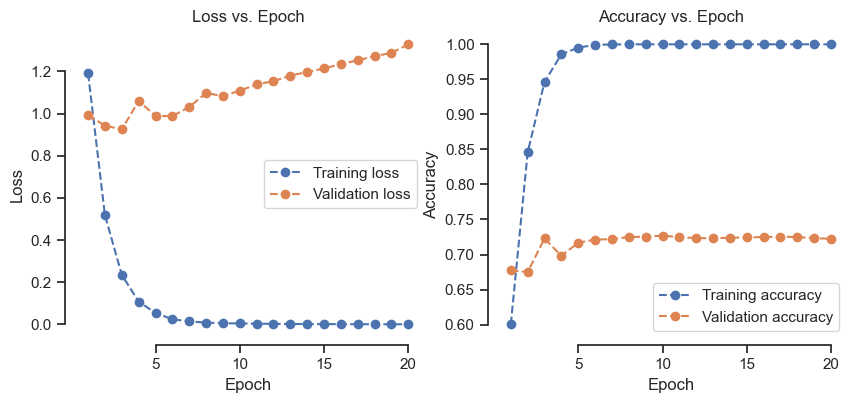

In [67]:
# TODO plot learning curves

####################
## YOUR CODE HERE ##
####################
plot_learning_curves(hist=hist)

# Subtask 2.4

## Compare CNN with MLP

#### TODO
- Train an MLP model and compare the results with the CNN model you trained regarding the performance of the model, time of training, and the number of parameters.

In [68]:
####################
## YOUR CODE HERE ##
####################

model = keras.Sequential(
    [
        layers.Flatten(input_shape=(img_height, img_width, 3)),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 150528)            0         
                                                                 
 dense_24 (Dense)            (None, 512)               77070848  
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 7)                 455       
                                                                 
Total params: 77,243,783
Trainable params: 77,243,783


In [69]:
num_epochs = 20
learning_rate = 0.001
import os

checkpoint_dir = "./checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, "model_checkpoint_mlp.h5")


optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])


checkpoint_callback = keras.callbacks.ModelCheckpoint(
    checkpoint_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max"
)

hist = model.fit(
    train_ds, epochs=num_epochs, validation_data=val_ds, callbacks=[checkpoint_callback], batch_size=32
)

Epoch 1/20
248/248 [==============================] - ETA: 0s - loss: 1478.0559 - accuracy: 0.2047
Epoch 1: val_accuracy improved from -inf to 0.23927, saving model to ./checkpoints\model_checkpoint_mlp.h5
248/248 [==============================] - 136s 545ms/step - loss: 1478.0559 - accuracy: 0.2047 - val_loss: 165.0979 - val_accuracy: 0.2393
Epoch 2/20
248/248 [==============================] - ETA: 0s - loss: 117.6273 - accuracy: 0.2477
Epoch 2: val_accuracy improved from 0.23927 to 0.25896, saving model to ./checkpoints\model_checkpoint_mlp.h5
248/248 [==============================] - 135s 545ms/step - loss: 117.6273 - accuracy: 0.2477 - val_loss: 97.3252 - val_accuracy: 0.2590
Epoch 3/20
248/248 [==============================] - ETA: 0s - loss: 53.3743 - accuracy: 0.2732
Epoch 3: val_accuracy improved from 0.25896 to 0.26098, saving model to ./checkpoints\model_checkpoint_mlp.h5
248/248 [==============================] - 147s 593ms/step - loss: 53.3743 - accuracy: 0.2732 - val_l

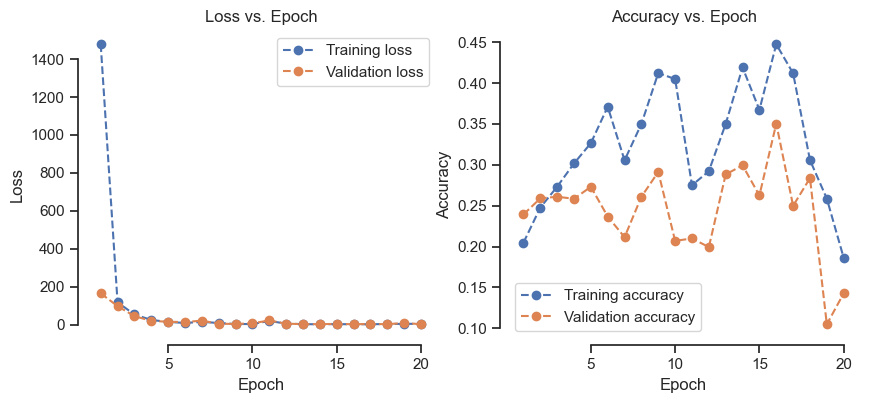

In [70]:
plot_learning_curves(hist=hist)

# Subtask 2.5

## Model architecture

We did only one step of down-sampling using the max-pooling layer. From `model.summary()` we can see that a Dense layer that maps a vector with the size of 111 $\times$ 111 $\times$ 8 to the output size of 7 is needed. Having a layer with such large number of parameters is prone to over-fitting. Let us perform more steps of down-sampling to avoid this.

#### TODO
 - Keep everything the same as the previous TODO, but perform four steps of convolution and max-pooling rather than just one.
 - In each step of down-sampling double the number of filters.


In [71]:
inputs = layers.Input(shape=(img_height, img_width, 3))
x = layers.Rescaling(1.0 / 255)(inputs)
x = layers.Conv2D(
    8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"
)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(
    16, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"
)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(
    32, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"
)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(
    64, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"
)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_10 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_46 (Conv2D)          (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 112, 112, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 56, 56, 16)       0         
 g2D)                                                      

In [72]:
# TODO compile and train the model

####################
## YOUR CODE HERE ##
####################

num_epochs = 20
learning_rate = 0.001
import os

checkpoint_dir = "./checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, "model_checkpoint_conv2.h5")


optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])


checkpoint_callback = keras.callbacks.ModelCheckpoint(
    checkpoint_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max"
)

hist = model.fit(
    train_ds, epochs=num_epochs, validation_data=val_ds, callbacks=[checkpoint_callback], batch_size=32
)

Epoch 1/20
248/248 [==============================] - ETA: 0s - loss: 1.2542 - accuracy: 0.5474
Epoch 1: val_accuracy improved from -inf to 0.72792, saving model to ./checkpoints\model_checkpoint_conv2.h5
248/248 [==============================] - 145s 576ms/step - loss: 1.2542 - accuracy: 0.5474 - val_loss: 0.8281 - val_accuracy: 0.7279
Epoch 2/20
248/248 [==============================] - ETA: 0s - loss: 0.6598 - accuracy: 0.7808
Epoch 2: val_accuracy improved from 0.72792 to 0.81979, saving model to ./checkpoints\model_checkpoint_conv2.h5
248/248 [==============================] - 144s 579ms/step - loss: 0.6598 - accuracy: 0.7808 - val_loss: 0.5541 - val_accuracy: 0.8198
Epoch 3/20
248/248 [==============================] - ETA: 0s - loss: 0.4729 - accuracy: 0.8461
Epoch 3: val_accuracy did not improve from 0.81979
248/248 [==============================] - 143s 575ms/step - loss: 0.4729 - accuracy: 0.8461 - val_loss: 0.5513 - val_accuracy: 0.8122
Epoch 4/20
248/248 [===============

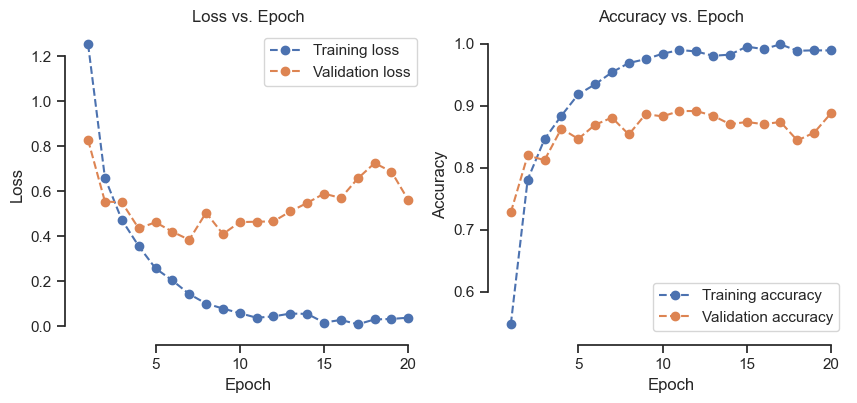

In [73]:
# TODO plot learning curves

####################
## YOUR CODE HERE ##
####################
plot_learning_curves(hist=hist)

You can also perform global average pooling and down-sample the input image to a vector. Let us implement a `GlobalAveragePooling2D` layer rather than the `Flatten` layer. 

#### TODO
- Keep every setting as the previous TODO, and replace the `Flatten` layer with `GlobalAveragePooling2D`.
- Train the model for 20 epochs.

In [74]:
inputs = layers.Input(shape=(img_height, img_width, 3))
x = layers.Rescaling(1.0 / 255)(inputs)
x = layers.Conv2D(
    8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"
)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(
    16, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"
)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(
    32, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"
)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(
    64, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"
)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.GlobalAvgPool2D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_11 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_50 (Conv2D)          (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 112, 112, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 56, 56, 16)       0         
 g2D)                                                     

In [75]:
# TODO compile and train the model

####################
## YOUR CODE HERE ##
####################

num_epochs = 20
learning_rate = 0.001
import os

checkpoint_dir = "./checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, "model_checkpoint_avg.h5")


optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])


checkpoint_callback = keras.callbacks.ModelCheckpoint(
    checkpoint_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max"
)

hist = model.fit(
    train_ds, epochs=num_epochs, validation_data=val_ds, callbacks=[checkpoint_callback], batch_size=32
)

Epoch 1/20
248/248 [==============================] - ETA: 0s - loss: 1.8189 - accuracy: 0.2824
Epoch 1: val_accuracy improved from -inf to 0.37002, saving model to ./checkpoints\model_checkpoint_avg.h5
248/248 [==============================] - 106s 425ms/step - loss: 1.8189 - accuracy: 0.2824 - val_loss: 1.6919 - val_accuracy: 0.3700
Epoch 2/20
248/248 [==============================] - ETA: 0s - loss: 1.4366 - accuracy: 0.4766
Epoch 2: val_accuracy improved from 0.37002 to 0.57446, saving model to ./checkpoints\model_checkpoint_avg.h5
248/248 [==============================] - 88s 352ms/step - loss: 1.4366 - accuracy: 0.4766 - val_loss: 1.2120 - val_accuracy: 0.5745
Epoch 3/20
248/248 [==============================] - ETA: 0s - loss: 1.1165 - accuracy: 0.6052
Epoch 3: val_accuracy improved from 0.57446 to 0.62342, saving model to ./checkpoints\model_checkpoint_avg.h5
248/248 [==============================] - 75s 300ms/step - loss: 1.1165 - accuracy: 0.6052 - val_loss: 1.0795 - val

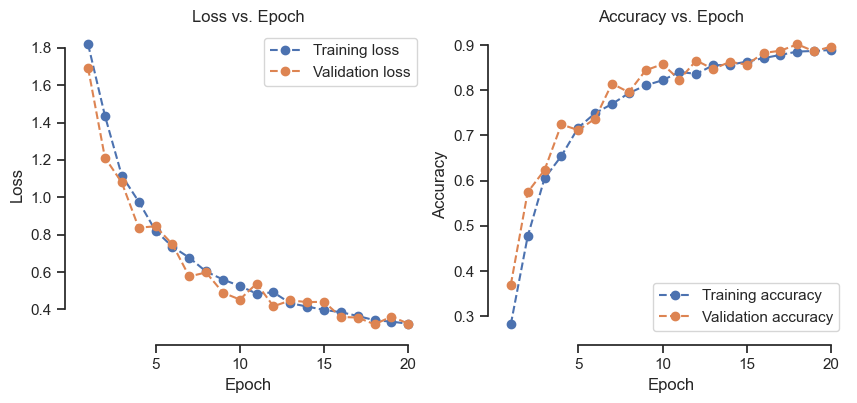

In [76]:
# TODO plot learning curves

####################
## YOUR CODE HERE ##
####################
plot_learning_curves(hist=hist)

# Subtask 2.6
## Challenge

#### TODO
- Modify the architecture to obtain higher accuracy. 
- You may use regularization and `BatchNormalization`.

In [79]:
####################
## YOUR CODE HERE ##
####################

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 7
model = keras.Sequential(
    [
        layers.Input(shape=(img_height, img_width, 3)),
        layers.Rescaling(1.0 / 255),
        layers.Conv2D(
            8, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'
        ),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(
            16, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'
        ),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(
            32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'
        ),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(
            64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'
        ),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.GlobalAvgPool2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax'),
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_14 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_60 (Conv2D)          (None, 224, 224, 8)       224       
                                                                 
 batch_normalization_22 (Bat  (None, 224, 224, 8)      32        
 chNormalization)                                                
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 112, 112, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 112, 112, 16)      1168      
                                                                 
 batch_normalization_23 (Bat  (None, 112, 112, 16)    

In [82]:
num_epochs = 20
learning_rate = 0.001
import os

checkpoint_dir = "./checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, "model_checkpoint_avg_best.h5")


optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])


checkpoint_callback = keras.callbacks.ModelCheckpoint(
    checkpoint_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max"
)

hist = model.fit(
    train_ds, epochs=num_epochs, validation_data=val_ds, callbacks=[checkpoint_callback], batch_size=32
)

Epoch 1/20
248/248 [==============================] - ETA: 0s - loss: 0.2105 - accuracy: 0.9276
Epoch 1: val_accuracy improved from -inf to 0.30490, saving model to ./checkpoints\model_checkpoint_avg_best.h5
248/248 [==============================] - 100s 400ms/step - loss: 0.2105 - accuracy: 0.9276 - val_loss: 5.3325 - val_accuracy: 0.3049
Epoch 2/20
248/248 [==============================] - ETA: 0s - loss: 0.1788 - accuracy: 0.9412
Epoch 2: val_accuracy improved from 0.30490 to 0.90459, saving model to ./checkpoints\model_checkpoint_avg_best.h5
248/248 [==============================] - 104s 419ms/step - loss: 0.1788 - accuracy: 0.9412 - val_loss: 0.3342 - val_accuracy: 0.9046
Epoch 3/20
248/248 [==============================] - ETA: 0s - loss: 0.1537 - accuracy: 0.9527
Epoch 3: val_accuracy did not improve from 0.90459
248/248 [==============================] - 105s 421ms/step - loss: 0.1537 - accuracy: 0.9527 - val_loss: 0.4007 - val_accuracy: 0.8748
Epoch 4/20
248/248 [=========

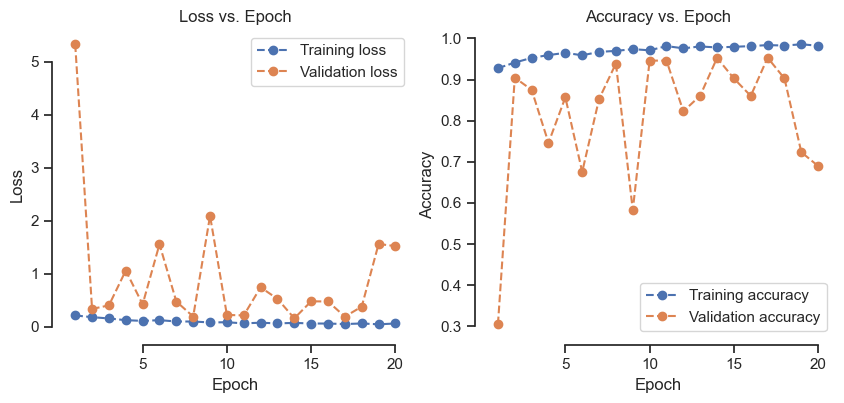

In [83]:
plot_learning_curves(hist=hist)

# Subtask 2.7
## ResNet architecture


"*Deeper neural networks are more difficult to train.  We present a residual learning framework to ease the training of networks that are substantially deeper than those used previously.*" [ https://arxiv.org/pdf/1512.03385.pdf]

That was the intention of He et al. to develop residual networks.

A ResNet is built of blocks which are called the *Residual Blocks*. 
A residual block uses *skip connections* - shortCuts — to jump over some layers to skip some activations.
The Resnet skips connections via addition.

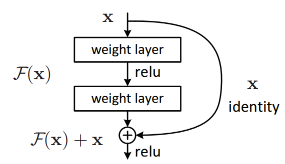

**Hints**

- A function for residual block is given below. Here, the image resolution is downsampled by strided convolution (stride=2 in the Conv2d layers).
- For the adding part, the dimensions obviously have to be the same. This is accomplished by using stride=2 in the first Conv2d layer of the block while the second layer does not change the dimensions. We also process the input `x` by a strided convolution with a filter size of `(1, 1)`.

In [ ]:
def Res_Block(x, filters):
    y = layers.Conv2D(filters, (3, 3), strides=2, padding="same")(x)
    y = layers.ReLU()(y)
    y = layers.BatchNormalization()(y)

    y = layers.Conv2D(filters, (3, 3), strides=1, padding="same")(y)
    y = layers.ReLU()(y)
    y = layers.BatchNormalization()(y)

    x = layers.Conv2D(filters, (1, 1), strides=2, padding="same")(x)
    out = layers.Add()([x, y])
    out = layers.ReLU()(out)
    out = layers.BatchNormalization()(out)
    return out

#### TODO
- Create a model containing four residual blocks with filter sizes of 8, 16, 32, and 64.
- Train the model and plot the learning curves.

In [ ]:
inputs = layers.Input(shape=(img_height, img_width, 3))
x = layers.Rescaling(1.0 / 255)(inputs)
x = layers.Conv2D(
    8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"
)(x)
x = Res_Block(x, 8)
x = Res_Block(x, 16)
x = Res_Block(x, 32)
x = Res_Block(x, 64)
x = layers.GlobalAvgPool2D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_6 (Rescaling)        (None, 224, 224, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv2d_21 (Conv2D)             (None, 224, 224, 8)  224         ['rescaling_6[0][0]']            
                                                                                                  
 conv2d_22 (Conv2D)             (None, 112, 112, 8)  584         ['conv2d_21[0][0]']        

In [ ]:
# TODO compile and train the model

####################
## YOUR CODE HERE ##
####################

num_epochs = 20
learning_rate = 0.001
import os

checkpoint_dir = "./checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, "model_checkpoint_avg_best_res.h5")


checkpoint_callback = keras.callbacks.ModelCheckpoint(
    checkpoint_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max"
)

hist = model.fit(
    train_ds, epochs=num_epochs, validation_data=val_ds, callbacks=[checkpoint_callback], batch_size=32
)

Epoch 1/20
248/248 [==============================] - ETA: 0s - loss: 1.0243 - accuracy: 0.6516
Epoch 1: val_accuracy improved from -inf to 0.14791, saving model to ./checkpoints\model_checkpoint_avg_best_res.h5
248/248 [==============================] - 121s 478ms/step - loss: 1.0243 - accuracy: 0.6516 - val_loss: 6.3506 - val_accuracy: 0.1479
Epoch 2/20
248/248 [==============================] - ETA: 0s - loss: 0.5745 - accuracy: 0.8033
Epoch 2: val_accuracy improved from 0.14791 to 0.32004, saving model to ./checkpoints\model_checkpoint_avg_best_res.h5
248/248 [==============================] - 117s 471ms/step - loss: 0.5745 - accuracy: 0.8033 - val_loss: 3.3825 - val_accuracy: 0.3200
Epoch 3/20
248/248 [==============================] - ETA: 0s - loss: 0.4330 - accuracy: 0.8516
Epoch 3: val_accuracy improved from 0.32004 to 0.71378, saving model to ./checkpoints\model_checkpoint_avg_best_res.h5
248/248 [==============================] - 116s 466ms/step - loss: 0.4330 - accuracy: 0.

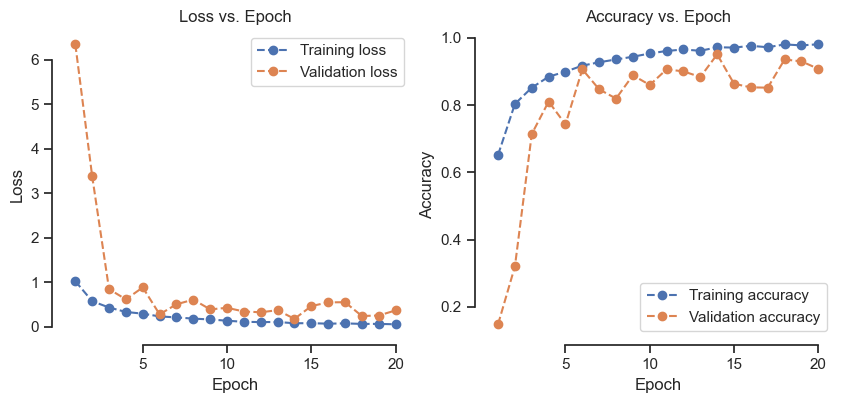

In [ ]:
# TODO plot learning curves

####################
## YOUR CODE HERE ##
####################
plot_learning_curves(hist=hist)

# Subtask 2.8
## Transfer learning and fine-tuning

### TensorFlow tutorials
- [Transfer learning and fine-tuning](https://www.tensorflow.org/tutorials/images/transfer_learning)


In this subtask we will learn how to classify images of by using transfer learning from a pre-trained network. A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. You either use the pre-trained model as is or use transfer learning to customize this model to a given task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

Here, we will use `ResNet50`$^1$ pre-trained on `ImageNet` dataset. Let us load the model from `tensorflow.keras.applications`. We remove the fully-connected layers by setting `include_top` as False.

$^1$ [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) (CVPR 2015)

In [87]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

Note that we will freeze the parameters of the `ResNet50` by setting `model.trainable = False`.

In [88]:
input_shape = (img_height, img_width, 3)
input_tensor = preprocess_input(layers.Input(shape=input_shape, name="model_inputs"))
resnet50 = ResNet50(
    weights="imagenet",
    input_shape=input_shape,
    input_tensor=input_tensor,
    include_top=False,
)

resnet50.trainable = False

We will add new layers on top of the pre-trained `ResNet50` and perform the training process only for the new layers. 
#### TODO
- Add a global average pooling and a fully-connected layer on top the `ResNet` model.
- Train the model as before.
- Plot the learning curves. 

In [89]:
x = resnet50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model_resnet50 = models.Model(resnet50.input, outputs)
print(model_resnet50.summary())

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 model_inputs (InputLayer)      [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.__operators__.getitem_1 (Sl  (None, 224, 224, 3)  0          ['model_inputs[0][0]']           
 icingOpLambda)                                                                                   
                                                                                                  
 tf.nn.bias_add_1 (TFOpLambda)  (None, 224, 224, 3)  0           ['tf.__operators__.getitem_1[0][0
                                                                 ]']                       

In [90]:
# TODO compile and train the model

####################
## YOUR CODE HERE ##
####################

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
num_epochs = 20
learning_rate = 0.001
import os

checkpoint_dir = "./checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, "model_checkpoint_transf.h5")


checkpoint_callback = keras.callbacks.ModelCheckpoint(
    checkpoint_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max"
)

hist = model.fit(
    train_ds, epochs=num_epochs, validation_data=val_ds, callbacks=[checkpoint_callback], batch_size=32
)

Epoch 1/20
248/248 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9850
Epoch 1: val_accuracy improved from -inf to 0.85613, saving model to ./checkpoints\model_checkpoint_transf.h5
248/248 [==============================] - 121s 484ms/step - loss: 0.0482 - accuracy: 0.9850 - val_loss: 0.6991 - val_accuracy: 0.8561
Epoch 2/20
248/248 [==============================] - ETA: 0s - loss: 0.0522 - accuracy: 0.9835
Epoch 2: val_accuracy improved from 0.85613 to 0.90712, saving model to ./checkpoints\model_checkpoint_transf.h5
248/248 [==============================] - 108s 433ms/step - loss: 0.0522 - accuracy: 0.9835 - val_loss: 0.3418 - val_accuracy: 0.9071
Epoch 3/20
248/248 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9870
Epoch 3: val_accuracy improved from 0.90712 to 0.97527, saving model to ./checkpoints\model_checkpoint_transf.h5
248/248 [==============================] - 110s 445ms/step - loss: 0.0417 - accuracy: 0.9870 - val_loss: 0

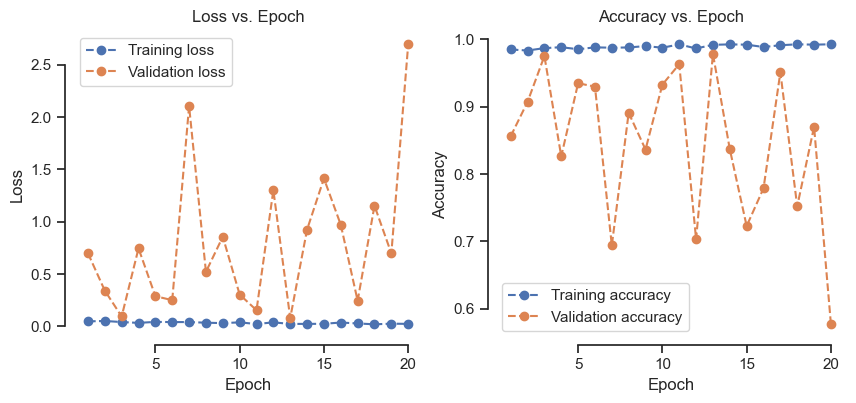

In [91]:
# TODO plot learning curves

####################
## YOUR CODE HERE ##
####################
plot_learning_curves(hist=hist)

# Subtask 2.9

## Model performance

#### TODO
- Use the best model you have trained and for the validation dataset report:
    - accuracy
    - precision
    - recall
- Plot the confusion matrix.
    
    


In [97]:
####################
## YOUR CODE HERE ##
####################
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
)
import matplotlib.pyplot as plt
import seaborn as sns

val_labels = []
for images, labels in val_ds:
    val_labels.extend(labels.numpy())  # Assuming labels are in a numpy array
val_labels = np.array(val_labels)

val_predictions = []
for images, _ in val_ds:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    val_predictions.extend(predicted_labels)
val_predictions = np.array(val_predictions)


accuracy = accuracy_score(val_labels, val_predictions)
precision = precision_score(val_labels, val_predictions, average="weighted")
recall = recall_score(val_labels, val_predictions, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

1/1 [==============================] - 0s 90ms/step
Accuracy: 0.5769813225643614
Precision: 0.7654938353976797
Recall: 0.5769813225643614


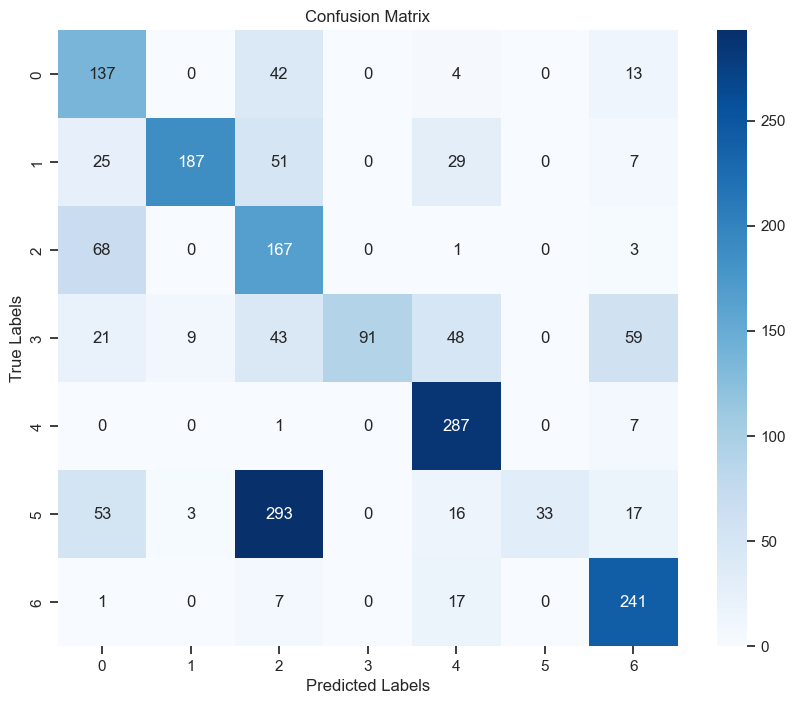

In [98]:
####################
## YOUR CODE HERE ##
####################
plt.figure(figsize=(10, 8))
confusion_mat = confusion_matrix(val_labels, val_predictions)
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Subtask 2.10
## Grad-CAM class activation visualization

Class Activation Maps (CAMs) are visualization methods used for explaining deep learning models. The Grad-CAM technique utilizes the gradients of the classification score with respect to the final convolutional feature map, to identify the parts of an input image that most impact the classification score. The places where this gradient is large are exactly the places where the final score depends most on the data.

Here, we will use the Grad-Cam algorithm to explain why the model is classified an input sample to a certain class.

### TensorFlow Tutorials:
- [Grad-CAM class activation visualization](https://keras.io/examples/vision/grad_cam/#the-gradcam-algorithm)

#### TODO

Employ the model you trained based on the `ResNet50` model. The Grad-CAM algorithm is provided below. 

- Use the function and compute the heatmap for an input sample from the validation dataset.
- You should compute the heatmap with respect to the final convolutional feature map: `last_conv_layer_name = conv5_block3_out`. To get the values for `last_conv_layer_name` use `model.summary()` to see the names of all layers in the model.
- Plot the heatmap.


### The Grad-CAM algorithm

In [104]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


#### TODO
 - Visualize one of the samples in the validation dataset.
 - Put the label as the title of the image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor([3 4 0 1 5 2 6 3 6 5 4 0 6 5 1 4 2 4 0 5 5 5 5 3 1 0 5 5 2 0 5 0], shape=(32,), dtype=int32)


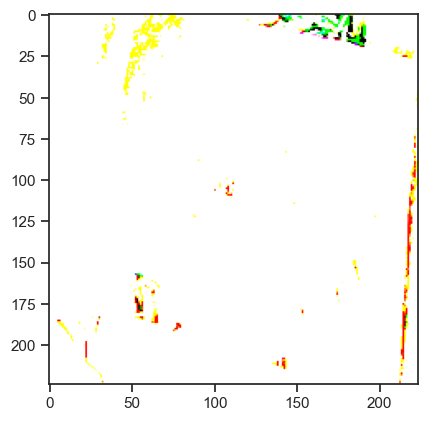

In [101]:
# TODO visualize one image sample

####################
## YOUR CODE HERE ##
####################
import matplotlib.pyplot as plt

sample_image, sample_label = next(iter(val_ds))
plt.imshow(sample_image[0])


In [102]:
layer_names = [layer.name for layer in model.layers]

# Print the layer names
for name in layer_names:
    print(name)

rescaling_14
conv2d_60
batch_normalization_22
max_pooling2d_47
conv2d_61
batch_normalization_23
max_pooling2d_48
conv2d_62
batch_normalization_24
max_pooling2d_49
conv2d_63
batch_normalization_25
max_pooling2d_50
global_average_pooling2d_9
dense_31
dropout_2
dense_32
dropout_3
dense_33
